![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# <font color = black> EDA : G2M insight for Cab Investment firm </font>

### <font color = #950CDF>Import Libraries</font>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, timedelta
from scipy import stats
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### <font color = #950CDF>Import Datasets into Dataframes</font>

In [11]:
# Read CSV Files from Datasets Folder
df_cab = pd.read_csv('Datasets/Cab_Data.csv')
df_city = pd.read_csv('Datasets/City.csv')
df_cust = pd.read_csv('Datasets/Customer_ID.csv')
df_trans = pd.read_csv('Datasets/Transaction_ID.csv')

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <center> <font color = black>PART 1 - Data Analysis</font> </center>

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #950CDF>A) Cab Data Analysis</font>

#### <font color = #27C3E5>1) Display sample data</font>

In [12]:
df_cab.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


#### <font color = #27C3E5>2) Cab Schema Details</font>

In [13]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


#### <font color = #27C3E5>3) Data Cleaning, Transformation and Summary Statistics</font>

<AxesSubplot:>

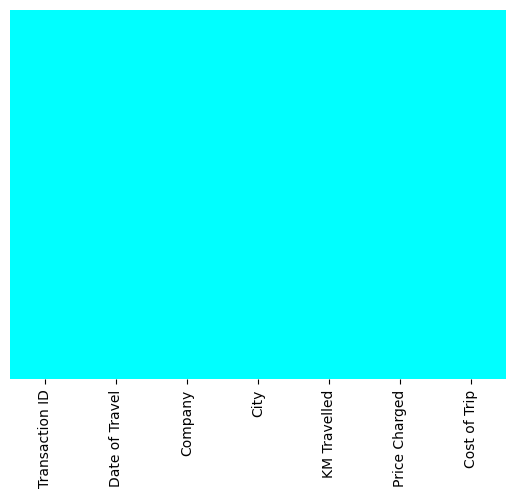

In [14]:
# Check for Nulls
sns.heatmap(df_cab.isnull(), yticklabels=False, cbar=False, cmap="cool")

In [15]:
# Remove duplicates if any
df_cab = df_cab.drop_duplicates(keep="first")
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.9+ MB


In [16]:
# Convert Date of travel to datetime
a = df_cab['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
df_cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')


# Display cab schema
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 21.9+ MB


In [235]:
# Data Description
df_cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [8]:
df_cab.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [236]:
# Display Unique City Names
df_cab['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [237]:
# Display Unique Company Names
df_cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

### <font color = #950CDF>B) City Data Analysis</font>

#### <font color = #27C3E5>1) Display sample data</font>

In [238]:
df_city.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


#### <font color = #27C3E5>2) City Schema Details</font>

In [239]:
# Display City Schema
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


#### <font color = #27C3E5>3) Data Cleaning, Transformation and Summary Statistics</font>

<AxesSubplot:>

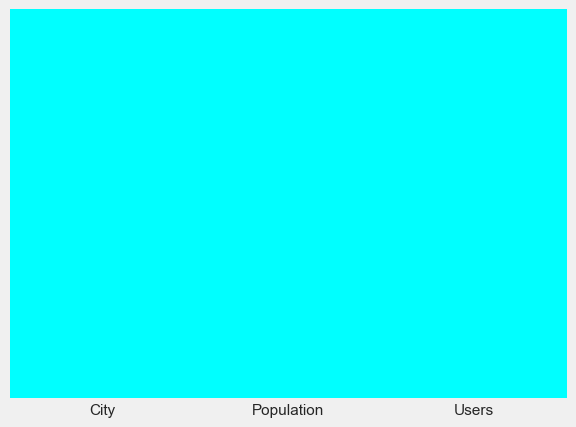

In [240]:
# Check for Nulls
sns.heatmap(df_city.isnull(), yticklabels=False, cbar=False, cmap="cool")

In [241]:
# Remove duplicates if any
df_city = df_city.drop_duplicates(keep="first")
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 640.0+ bytes


In [242]:
# Convert Population to float
df_city['Population'] = [x.replace(',','') for x in df_city['Population']]
df_city['Population'] = df_city['Population'].astype(float)

# Convert Users to float
df_city['Users'] = [x.replace(',','') for x in df_city['Users']]
df_city['Users'] = df_city['Users'].astype(float)

In [243]:
# Display city schema
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 640.0+ bytes


In [244]:
# Data Description
df_city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


### <font color = #950CDF>C) Customer Data Analysis</font>

#### <font color = #27C3E5>1) Display sample data</font>

In [245]:
df_cust.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


#### <font color = #27C3E5>2) Customer Schema Details</font>

In [246]:
# Display Customer Schema
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### <font color = #27C3E5>3) Data Cleaning, Transformation and Summary Statistics</font>

<AxesSubplot:>

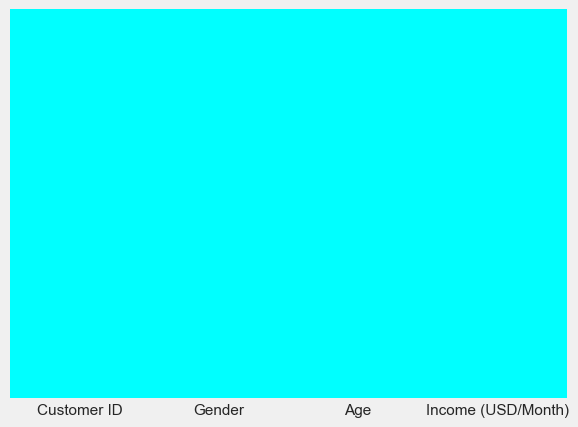

In [247]:
# Check for Nulls
sns.heatmap(df_cust.isnull(), yticklabels=False, cbar=False, cmap="cool")

In [248]:
# Remove duplicates if any
df_cust = df_cust.drop_duplicates(keep="first")
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ MB


In [249]:
# Data Description
df_cust.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


### <font color = #950CDF>D) Transaction Data Analysis</font>

#### <font color = #27C3E5>1) Display sample data</font>

In [250]:
df_trans.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


#### <font color = #27C3E5>2) Transaction Schema Details</font>

In [251]:
# Display Customer Schema
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### <font color = #27C3E5>3) Data Cleaning, Transformation and Summary Statistics</font>

<AxesSubplot:>

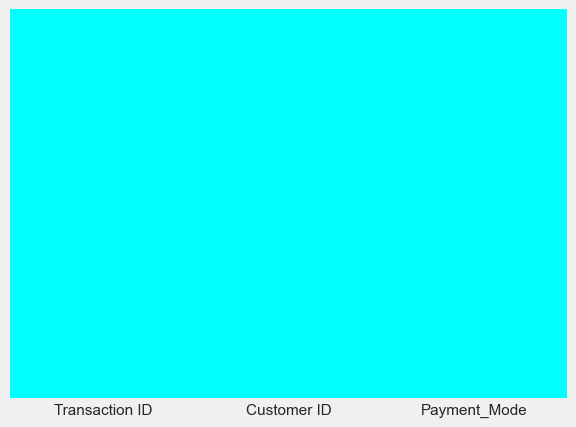

In [252]:
# Check for Nulls
sns.heatmap(df_trans.isnull(), yticklabels=False, cbar=False, cmap="cool")

In [253]:
# Remove duplicates if any
df_trans = df_trans.drop_duplicates(keep="first")
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.4+ MB


In [254]:
# Data Description
df_trans.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <center> <font color = black>PART 2 - Hypothesis Testing & Data Visualization</font> </center>

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #950CDF>A) Merge all Dataset</font>

In [255]:
df = df_cab.merge(df_trans, on= 'Transaction ID').merge(df_cust, on ='Customer ID').merge(df_city, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


### <font color = #950CDF>B) Visualize the data</font>

### <center><font color = #950CDF>1) Study Correlation Matrix</font></center>

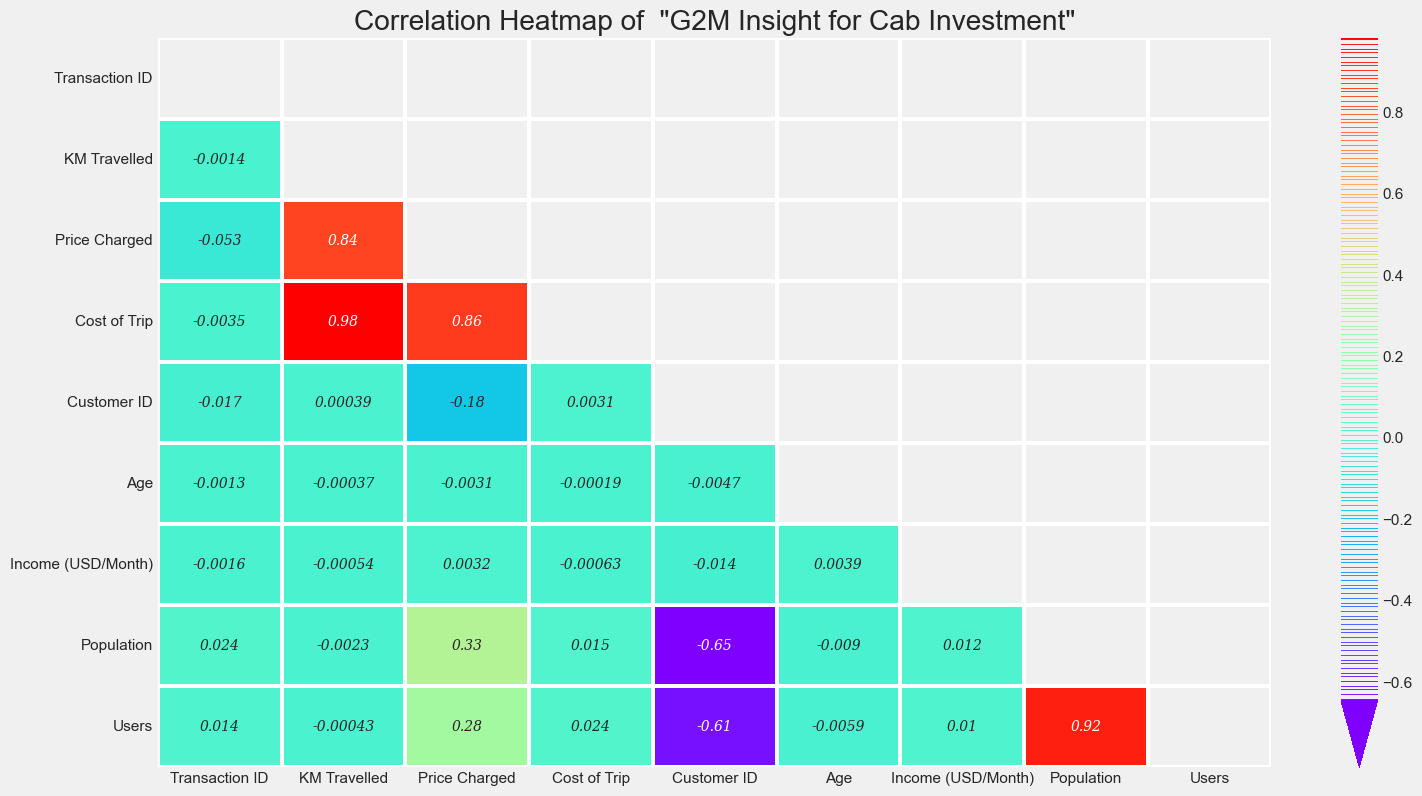

In [256]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of  "G2M Insight for Cab Investment"')

# Set the size of text
sns.set(font_scale = 1.2)

<br>
<center><b>CONCLUSION</b></center>

* The heatmap demonstrates that `KM Travelled` is strongly related to `Cost of Trip` and `Price Charged`. It also does not   depend on the customer's age or income.

* There is a clear association between `Population` and `Users`.

### <center><font color = #950CDF>2) Study Total Transactions per company</font></center>

### <font color = #950CDF> Hypothesis : Are the total transactions of one company more than or equal to double the transactions of the other?</font>
> <b>H0 :</b> Total Transactions are more than or equal to double of the other. <br><b>H1 :</b> Total Transactions are not more than or equal to double of the other

<AxesSubplot:title={'center':'Total Transactions by Payment Mode'}, xlabel='Company', ylabel='count'>

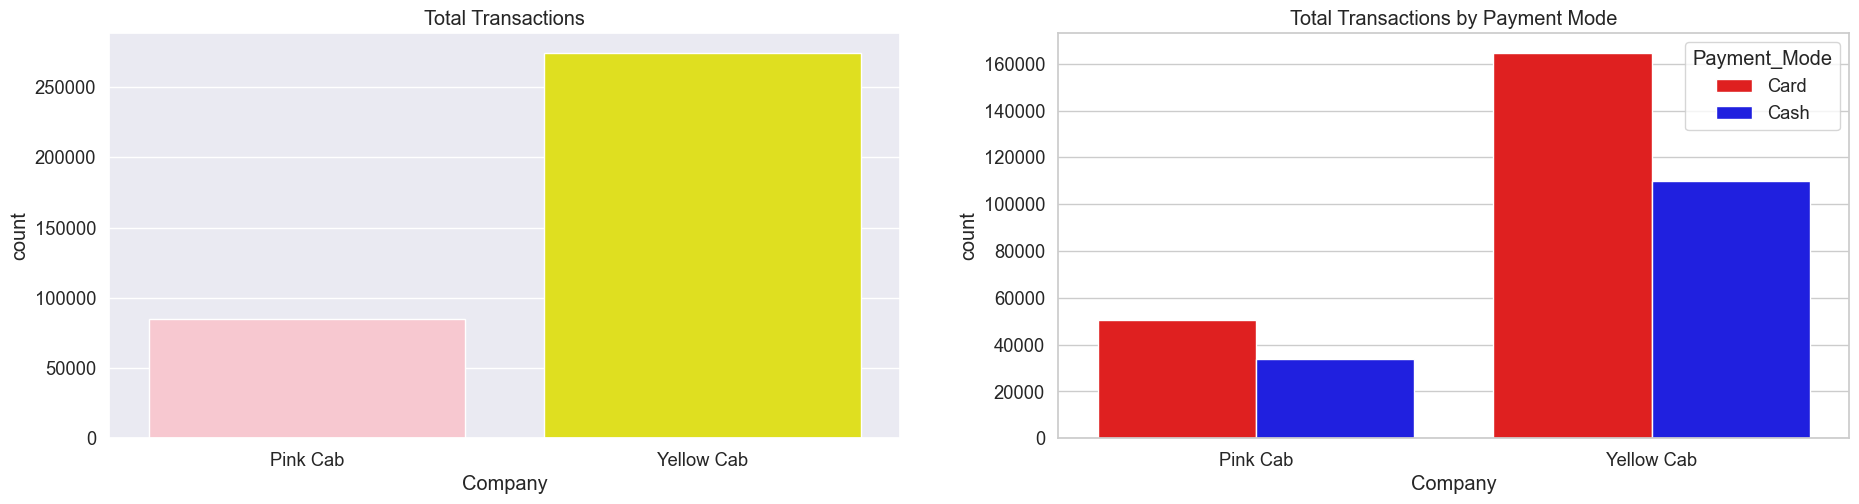

In [257]:
f = plt.figure(figsize=(20, 5))

f.add_subplot(1,2,1)
plt.title("Total Transactions")
sns.set_style("whitegrid")
sns.countplot(x="Company", data=df, palette=["pink","yellow"])

f.add_subplot(1,2,2)
plt.title("Total Transactions by Payment Mode")
sns.set_style("whitegrid")
sns.countplot(x="Company", hue="Payment_Mode", data=df, orient="h", palette=["red","blue"])

<br>
<center><b>CONCLUSION</b></center>

* From the plot above, we can see that the **Yellow Cab** company has overwhelmingly processed more transactions than Pink Cab.
<br></br>
* For both companies, the majority of payments where made by **Card**. This suggests that users of both cab companies find this payment method more convenient.
<br><br>
* Null Hypothesis holds true as the total transactions of Yellow Cab are clearly more than double of the Pink Cab

### <center><font color = #950CDF>3) Study Transactions in different cities</font></center>

### <font color = #950CDF> Hypothesis : Does New York have the highest number of cab users?</font>
> <b>H0 :</b> New York has the highest number of cab users. <br><b>H1 :</b> New York does not have the highest number of cab users.

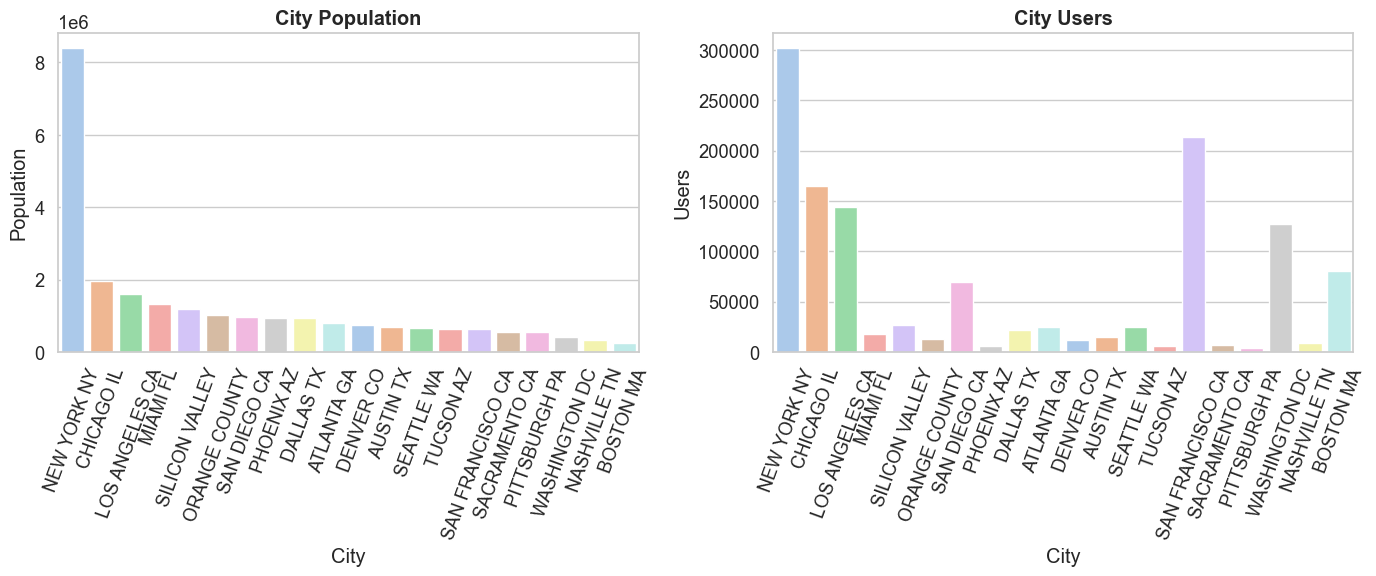

In [258]:
# location of transactions
f2 = plt.figure(figsize=(14,6))

# City Population
f2.add_subplot(1,2,1)
plt.title("City Population",fontweight='bold')
sns.set_style("whitegrid")
sns.barplot(x="City", y="Population", data=df_city, palette="pastel")
plt.xticks(rotation=70)


# City Users
f2.add_subplot(1,2,2)
plt.title("City Users",fontweight='bold')
sns.set_style("whitegrid")
sns.barplot(x="City", y="Users", data=df_city, palette="pastel")
plt.xticks(rotation=70)

f2.tight_layout()

<br>
<center><b>CONCLUSION</b></center>
<br>
<center>Most transactions happened in New York and then followed by Chicago </center>
<center>Null Hypothesis holds true as New York has the most transactions </center>

### <center><font color = #950CDF>3) Study Preffered Cab Company</font></center>

### <font color = #950CDF> Hypothesis : Is Pink Cab preffered over Yellow Cab?</font>
> <b>H0 :</b> Pink Cab is preffered over Yellow Cab. <br><b>H1 :</b> Pink Cab is not preffered over Yellow Cab.

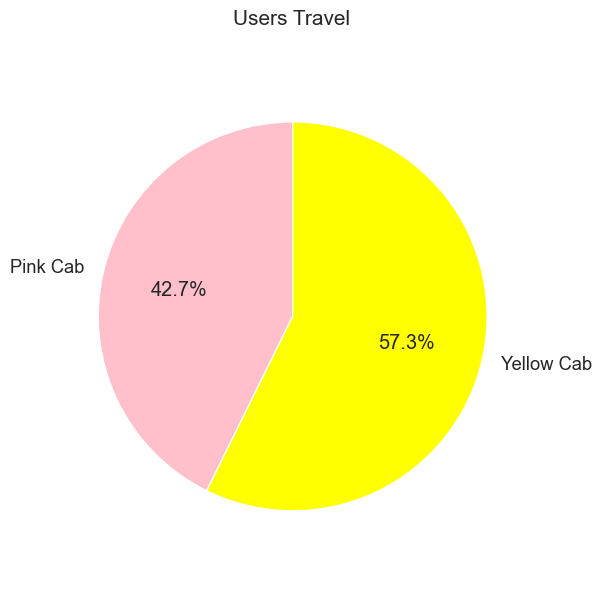

In [259]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

figp, axp = plt.subplots(figsize=(5,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=False, startangle=90,colors = ['pink', 'yellow'])
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)

plt.show()


<center><b>CONCLUSION</b></center>
<br>
<center> Users like to ride on <b>Yellow cab</b> more as compared to <b> Pink Cab </b> </center>
<center> Null Hypothesis does not hold true in this case </center>

### <center><font color = #950CDF>4) Study Price comparision</font></center>


### <font color = #950CDF> Hypothesis : Is Pink Cab charging more than Yellow Cab?</font>
> <b>H0 :</b> Pink Cab is charging more than Yellow Cab. <br><b>H1 :</b>  Pink Cab is not charging more than Yellow Cab.

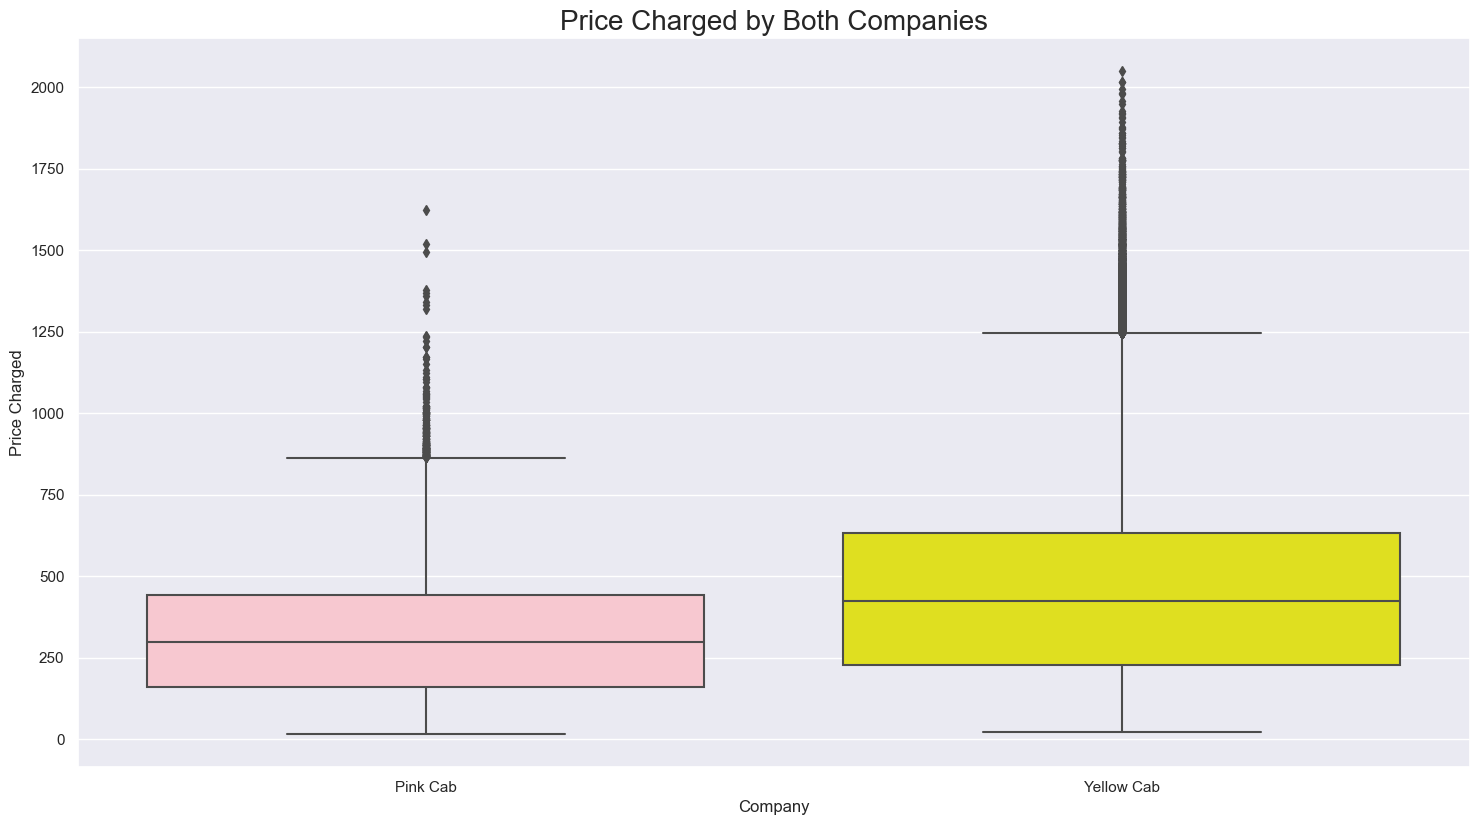

In [260]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))
sns.boxplot(df['Company'], df['Price Charged'],palette=['pink', 'yellow'])
plt.title('Price Charged by Both Companies', fontsize=20)
plt.show()

<br>
<center><b>CONCLUSION</b></center>
<br>
<center> <b>Yellow Cab</b> charged more as compared to <b> Pink Cab </b> </center>
<center> Null Hypothesis failed in this case </center>

### <center><font color = #950CDF>5) Study Profit Margin</font></center>


### <font color = #950CDF> Hypothesis : Is Pink Cab making more profit than Yellow Cab?</font>
> <b>H0 :</b> Pink Cab is making more profit than Yellow Cab. <br><b>H1 :</b>  Pink Cab is not making more profit than Yellow Cab.

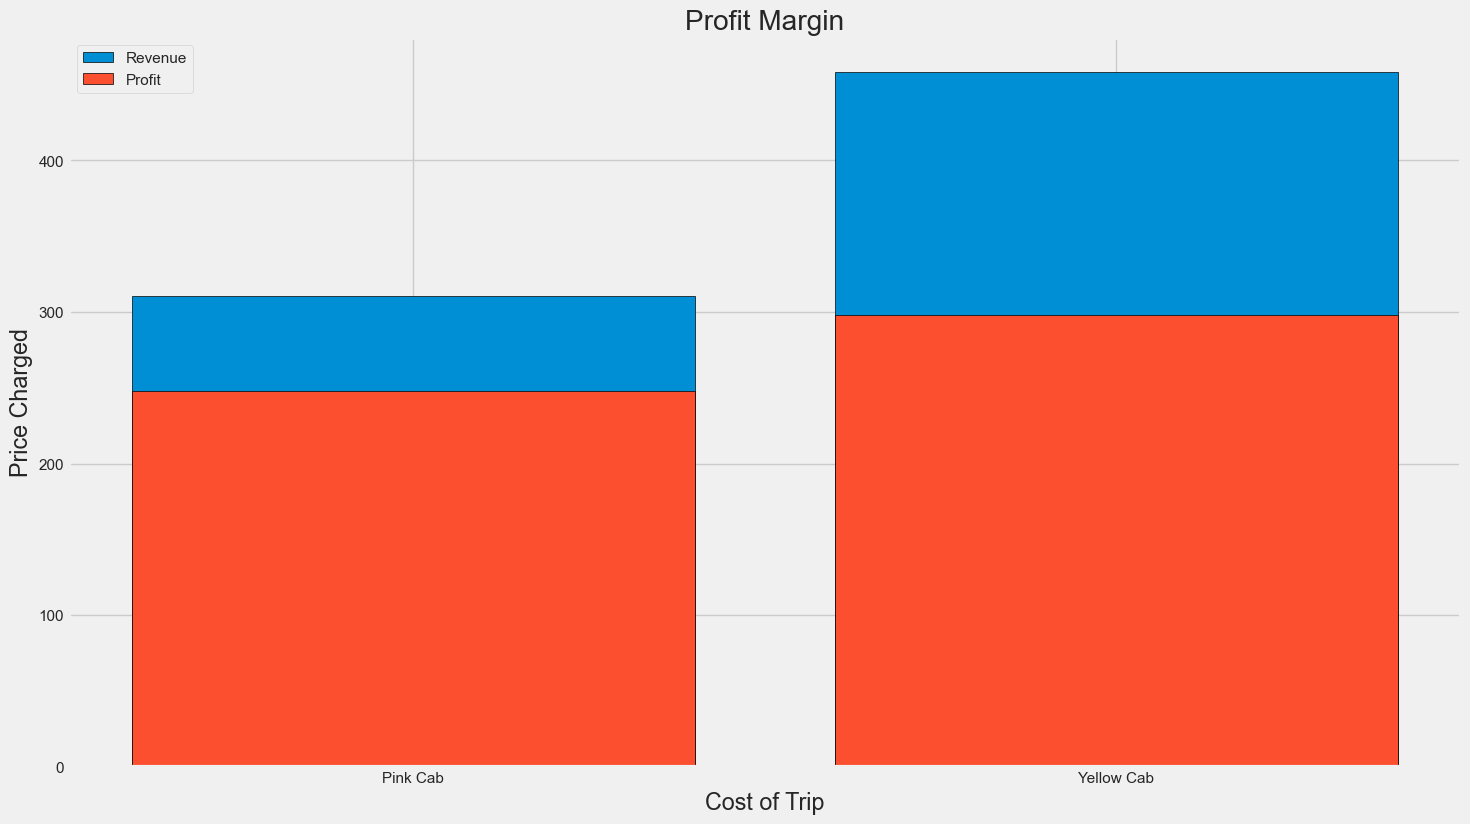

In [261]:
company = df.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

<br>
<center><b>CONCLUSION</b></center>
<br>
<center> <b>Yellow cab</b> has a higher Profit Margin (Price Charged - Cost of Trip) compared <b> Pink Cab </b> </center>
<center> Null Hypothesis failed in this case </center>

### <center><font color = #950CDF>6) Study Price Charged by Distance</font></center>


### <font color = #950CDF> Hypothesis : Is Pink Cab charging more by than Yellow Cab keeping distance as a parameter?</font>
> <b>H0 :</b> Pink Cab is charging more by the distance than Yellow Cab. <br><b>H1 :</b>  Pink Cab is not charging more by the distance than Yellow Cab.

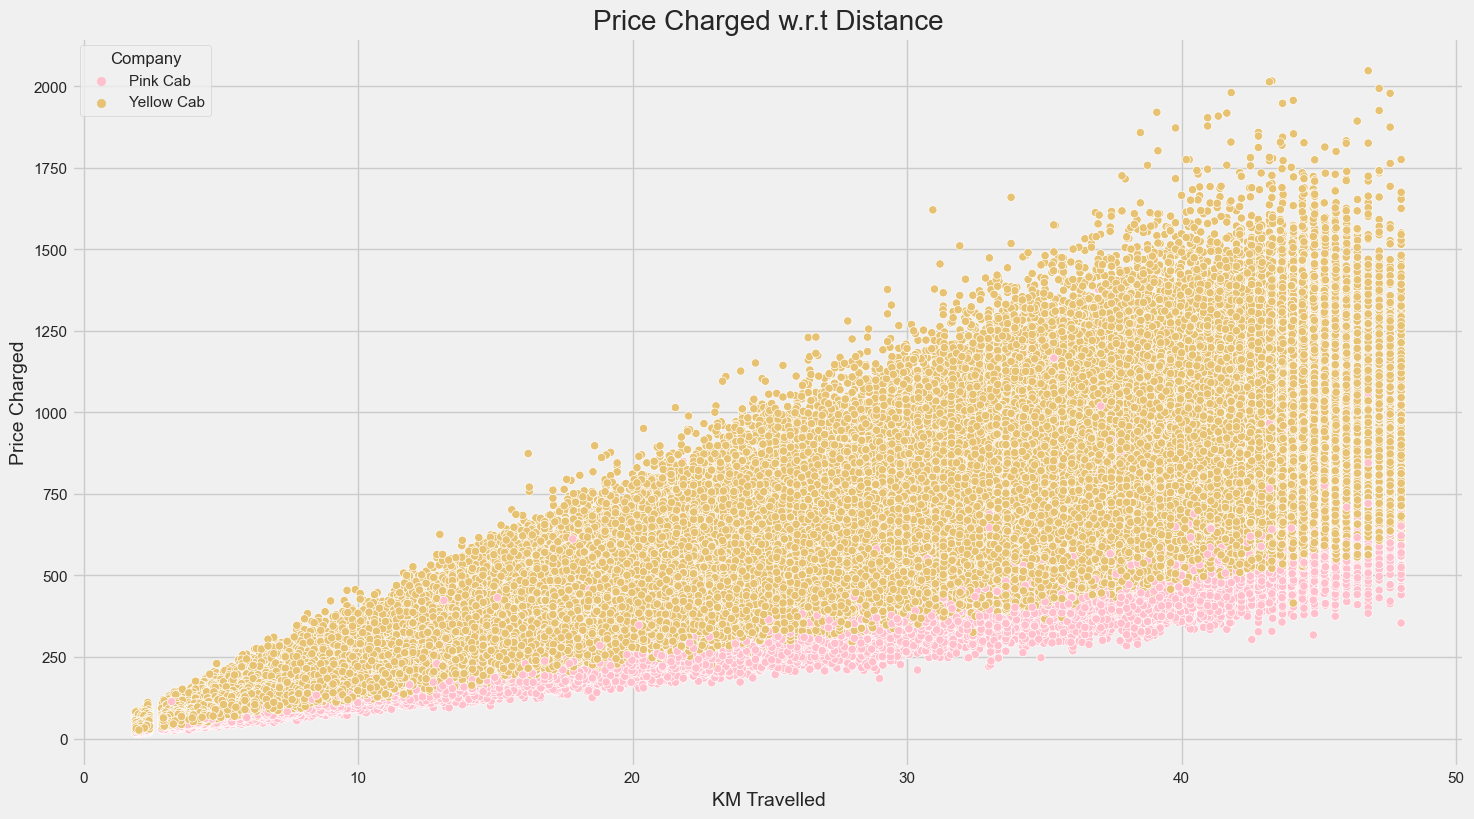

In [262]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company',palette=['pink', '#e8c273'])
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

<br>
<center><b>CONCLUSION</b></center>
<br>
<center> There is a linear relationship between KM traveled and Price Charged. However, <b>Yellow Cab</b> has higher charges compared to <b> Pink Cab </b>. </center>
<center> Null Hypothesis failed here </center>

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)